In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [3]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
##################################################################################################################
admiss_core = pd.read_csv(r"C:\Users\sviea\Downloads\100-Patients\AdmissionsCorePopulatedTable.txt", sep="\t", index_col = "PatientID")
admiss_diag_core = pd.read_csv(r"C:\Users\sviea\Downloads\100-Patients\AdmissionsDiagnosesCorePopulatedTable.txt", sep="\t", index_col="PatientID")
patient_core = pd.read_csv(r"C:\Users\sviea\Downloads\100-Patients\PatientCorePopulatedTable.txt", sep = "\t", index_col = "PatientID")
labs_core = pd.read_csv(r"C:\Users\sviea\Downloads\100-Patients\LabsCorePopulatedTable.txt", sep="\t", index_col = "PatientID")

In [4]:
admiss_core

,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,1,1993-02-11 18:57:04.003,1993-02-24 17:22:29.713
DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,2,2002-11-28 19:06:31.117,2002-12-04 19:14:40.797
DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,3,2011-07-19 18:42:45.287,2011-07-25 04:57:42.053
886B5885-1EE2-49F3-98D5-A2F02EB8A9D4,1,1994-12-03 22:20:46.077,1994-12-20 20:24:56.010
...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877


In [5]:
admiss_diag_core

,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
PatientID,,,
80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...
80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...
80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive"
80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...
6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...
...,...,...,...
2A8772FE-61DB-483E-B6BF-6C0A74BA9C2A,3,H15,Disorders of sclera
C65A4ADE-112E-49E4-B72A-0DED22C242ED,1,M05.27,Rheumatoid vasculitis with rheumatoid arthriti...
C65A4ADE-112E-49E4-B72A-0DED22C242ED,2,N16,Renal tubulo-interstitial disorders in disease...


In [6]:
patient_core

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
PatientID,,,,,,
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08
64182B95-EB72-4E2B-BE77-8050B71498CE,Male,1952-01-18 19:51:12.917,African American,Separated,English,13.03
DB22A4D9-7E4D-485C-916A-9CD1386507FB,Female,1970-07-25 13:04:20.717,Asian,Married,English,6.67
6E70D84D-C75F-477C-BC37-9177C3698C66,Male,1979-01-04 05:45:29.580,White,Married,English,16.09
C8556CC0-32FC-4CA5-A8CD-9CCF38816167,Female,1921-04-11 11:39:49.197,White,Married,English,18.20
...,...,...,...,...,...,...
135C831F-7DA5-46C0-959C-EBCBD8810B43,Male,1971-05-13 04:40:05.623,White,Unknown,Spanish,12.38
8856096E-E59C-4156-A767-C091AF799C80,Female,1988-11-25 02:59:36.373,White,Divorced,English,11.08
6623F5D6-D581-4268-9F9B-21612FBBF7B5,Female,1943-02-17 15:36:13.787,Asian,Single,Spanish,14.49


In [7]:
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [8]:
#labs_core.loc["F0B53A2C-98CA-415D-B928-E3FD0E52B22A", "LabDateTime"]
print(type(labs_core.iat[1, 4]))

<class 'str'>


This shows that what appears to be a date time is actually the string data type. That's gonna get messy if we try to do calculations with it.

Let's convert these strings to datetimes!

In [9]:
labs_core.iat[1, 4] = pd.to_datetime(labs_core.iat[1, 4])
print(type(labs_core.iat[1, 4]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Huzzah, it worked! Now we have to write a function that will do that for all of our columns that we want to datetype-ify

Testing if I can do this to an entire column at the same time

In [10]:
labs_core["LabDateTime"] = pd.to_datetime(labs_core["LabDateTime"])
print(type(labs_core.iat[3, 4]))
print(type(labs_core.iat[4, 4]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Neat.

In [11]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
#################################################################################################################
labs_core["LabDateTime"] = pd.to_datetime(labs_core["LabDateTime"])
print(type(labs_core.iat[3, 4]))
print(labs_core.iat[3, 4])
print()

admiss_core["AdmissionStartDate"] = pd.to_datetime(admiss_core["AdmissionStartDate"])
print(type(admiss_core.iloc[2][2]))
print(admiss_core.iloc[3][2])
print()

admiss_core["AdmissionEndDate"] = pd.to_datetime(admiss_core["AdmissionEndDate"])
print(type(admiss_core.iloc[2][1]))
print((admiss_core.iloc[2][2]))
print()

patient_core["PatientDateOfBirth"] = pd.to_datetime(patient_core["PatientDateOfBirth"])
print(type(patient_core.iloc[2][1]))
print((patient_core.iloc[2][1]))
print()


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1992-06-30 12:09:46.107000

<class 'str'>
2011-07-25 04:57:42.053

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2002-12-04 19:14:40.797000

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1970-07-25 13:04:20.717000



Looks good! We only have to do this for 4 columns so I'ma just not do the function right now

In [12]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [13]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [14]:
#this is doing:
# For patient 4, what is their end date - start date
# in other words how long were they in the hospital for?
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [15]:
# As is typical in complex data sets, information about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
##################################################################################################################
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'

print("____________________________________________________________________________________________________")
print("Admissions Core Table")
print("____________________________________________________________________________________________________")
print(admiss_core.loc[pid])
print("____________________________________________________________________________________________________")

print("Admissions Diagnoses Table")
print("____________________________________________________________________________________________________")
print(admiss_diag_core.loc[pid])
print("____________________________________________________________________________________________________")

print("Patient Core Table")
print("____________________________________________________________________________________________________")
print(patient_core.loc[pid])
print("____________________________________________________________________________________________________")

print("Labs Core Table")
print("____________________________________________________________________________________________________")
print(labs_core.loc[pid])
print("____________________________________________________________________________________________________")

____________________________________________________________________________________________________
Admissions Core Table
____________________________________________________________________________________________________
                                      AdmissionID      AdmissionStartDate  \
PatientID                                                                   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            7 2011-10-12 14:55:02.027   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            1 1978-06-29 07:29:11.593   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            2 1982-10-14 07:01:43.613   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            3 1990-02-23 04:28:34.457   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            4 1994-05-15 11:34:00.840   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            5 2001-01-10 11:04:58.943   
7A025E77-7832-4F53-B9A7-09A3F98AC17E            6 2001-12-29 20:28:01.050   

                                            AdmissionEndDate  
PatientID          

In [16]:
labs_core.loc[labs_core.index==pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [17]:
# SQL-like joins
## This line of code does a left-join of labs_core on patient_core
## it looks like python works like R where it will automatically join on a specific column in common between both 
## tables if you do not specify 
jdf =  patient_core.join(labs_core, how='left')

In [18]:
#my code
patient_lab = patient_core.join(labs_core, how="left")
patient_lab

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06 06:37:05.640,White,Unknown,English,15.02,1,CBC: NEUTROPHILS,9.0,k/cumm,1986-12-01 06:49:21.037
016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06 06:37:05.640,White,Unknown,English,15.02,1,METABOLIC: GLUCOSE,66.6,mg/dL,1986-12-01 18:54:20.190
016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06 06:37:05.640,White,Unknown,English,15.02,1,CBC: HEMATOCRIT,38.7,%,1986-12-01 02:35:31.567
016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06 06:37:05.640,White,Unknown,English,15.02,1,METABOLIC: POTASSIUM,3.1,mmol/L,1986-11-30 22:44:57.330
016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06 06:37:05.640,White,Unknown,English,15.02,1,CBC: WHITE BLOOD CELL COUNT,9.2,k/cumm,1986-11-30 20:32:15.443
...,...,...,...,...,...,...,...,...,...,...,...
FFCDECD6-4048-4DCB-B910-1218160005B3,Male,1941-05-06 14:56:42.687,White,Single,English,14.49,3,METABOLIC: POTASSIUM,5.3,mmol/L,2012-11-01 00:03:33.537
FFCDECD6-4048-4DCB-B910-1218160005B3,Male,1941-05-06 14:56:42.687,White,Single,English,14.49,3,METABOLIC: GLUCOSE,137.8,mg/dL,2012-10-31 10:00:24.543
FFCDECD6-4048-4DCB-B910-1218160005B3,Male,1941-05-06 14:56:42.687,White,Single,English,14.49,3,CBC: HEMOGLOBIN,13.9,gm/dl,2012-10-31 18:24:20.113


In [19]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [20]:
#My code
patient_lab.shape
patient_core.iloc[:,0]

PatientID
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F      Male
64182B95-EB72-4E2B-BE77-8050B71498CE      Male
DB22A4D9-7E4D-485C-916A-9CD1386507FB    Female
6E70D84D-C75F-477C-BC37-9177C3698C66      Male
C8556CC0-32FC-4CA5-A8CD-9CCF38816167    Female
                                         ...  
135C831F-7DA5-46C0-959C-EBCBD8810B43      Male
8856096E-E59C-4156-A767-C091AF799C80    Female
6623F5D6-D581-4268-9F9B-21612FBBF7B5    Female
65A7FBE0-EA9F-49E9-9824-D8F3AD98DAC0    Female
FB909FAE-72DD-4F6F-9828-D92183DF185F      Male
Name: PatientGender, Length: 100, dtype: object

The number of columns in the joined df (11) is equal to the number of columns in patients_core (6) + those in labs_core (5)


We've just concatenated these two tables ON PatientID

In [21]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
##################################################################################################################
print("Stats on Number of Labs per Patient")

#First we will make a new data frame that is grouped by PatientID
# patient_lab_group = patient_lab.groupby("PatientID")
# print(patient_lab_group.mean("PatientID"))

unique_labs_per_patient = patient_lab.groupby("PatientID")["LabDateTime"].nunique()
print(unique_labs_per_patient)

# I am trying to get the total number of labs divided by total number of admissions per patient

patient_lab =  patient_lab.join(unique_labs_per_patient, how='left', lsuffix= "_left", rsuffix ="_right")
print(patient_lab)






#################################################################################################################
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    
#################################################################################################################
print("Number of each lab")
#print(...)







Stats on Number of Labs per Patient
PatientID
016A590E-D093-4667-A5DA-D68EA6987D93    1132
03A481F5-B32A-4A91-BD42-43EB78FEBA77     528
0681FA35-A794-4684-97BD-00B88370DB41     913
0A9BA3E4-CF3C-49C4-9774-5EEA2EE7D123     958
0BC491C5-5A45-4067-BD11-A78BEA00D3BE     725
                                        ... 
FA157FA5-F488-4884-BF87-E144630D595C    1160
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F     627
FB909FAE-72DD-4F6F-9828-D92183DF185F     832
FE0B9B59-1927-45B7-8556-E079DC1DE30A     679
FFCDECD6-4048-4DCB-B910-1218160005B3    1136
Name: LabDateTime, Length: 100, dtype: int64
                                     PatientGender      PatientDateOfBirth  \
PatientID                                                                    
016A590E-D093-4667-A5DA-D68EA6987D93          Male 1960-12-06 06:37:05.640   
016A590E-D093-4667-A5DA-D68EA6987D93          Male 1960-12-06 06:37:05.640   
016A590E-D093-4667-A5DA-D68EA6987D93          Male 1960-12-06 06:37:05.640   
016A590E-D093-4667-A5DA-

In [22]:
patient_lab.groupby(["LabDateTime_left"]).mean()

TypeError: Could not convert Female to numeric

In [23]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
##################################################################################################################
print("Stats on Number of Labs per Patient")

print(patient_lab.groupby('PatientID').size().describe())





#################################################################################################################
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    
#################################################################################################################
print("Number of each lab")
print(patient_lab.groupby("LabName").size())



Stats on Number of Labs per Patient
count     100.00000
mean     1114.83000
std       539.36152
min        86.00000
25%       706.25000
50%      1032.50000
75%      1441.25000
max      2760.00000
dtype: float64
Number of each lab
LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: BASOPHILS                   3165
CBC: EOSINOPHILS                 3191
CBC: HEMATOCRIT                  3211
CBC: HEMOGLOBIN                  3193
CBC: LYMPHOCYTES                 3162
CBC: MCH                         3191
CBC: MCHC                        3202
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: MONOCYTES                   3129
CBC: NEUTROPHILS                 3224
CBC: PLATELET COUNT              3177
CBC: RDW                         3188
CBC: RED BLOOD CELL COUNT        3174
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: ALBUMIN               3202
METABOLIC: ALK PHOS              3154
METABOLIC: ALT/SGPT              3155
METABOLIC: ANION GAP             3166
ME

In [28]:
!pip install jupyter-matplotlib

ERROR: Could not find a version that satisfies the requirement jupyter-matplotlib (from versions: none)
ERROR: No matching distribution found for jupyter-matplotlib


In [24]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#################################################################################################################

#Here is a df with the number of unique labs per patient in ascending order
pt_most_labs= patient_lab.groupby("PatientID").size().sort_values()
print(pt_most_labs)
print("_____________________________________________________")

print(f"Patient with the most labs: {pt_most_labs[-1]} \n")



highest_pt_lab = patient_lab.groupby(['PatientID','LabName']).size().sort_values()
print(highest_pt_lab)
#################################################################################################################
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns
#
#################################################################################################################



PatientID
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D      86
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B     130
8856096E-E59C-4156-A767-C091AF799C80     230
C2CCB1AB-6633-4CB3-B4E8-157E6FB02376     360
672D554B-D6D1-40B2-A6A4-21A4CB6B1AA6     399
                                        ... 
7A025E77-7832-4F53-B9A7-09A3F98AC17E    2259
A0A976C8-9B30-4492-B8C4-5B25095B9192    2263
36775002-9EC3-4889-AD4F-80DC6855C8D8    2372
25B786AF-0F99-478C-9CFA-0EA607E45834    2561
80D356B4-F974-441F-A5F2-F95986D119A2    2760
Length: 100, dtype: int64
_____________________________________________________
Patient with the most labs: 2760 

PatientID                             LabName                     
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  CBC: LYMPHOCYTES                 1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  URINALYSIS: SPECIFIC GRAVITY     1
                                      CBC: HEMATOCRIT                  1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  METABOLIC: SODIUM                1
B7E9FC4C-5182-4A34-95

In [25]:
# 1) 
jdf.groupby(['PatientID','LabName']).size().sort_values()


PatientID                             LabName                     
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  CBC: LYMPHOCYTES                 1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  URINALYSIS: SPECIFIC GRAVITY     1
                                      CBC: HEMATOCRIT                  1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  METABOLIC: SODIUM                1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  CBC: EOSINOPHILS                 2
                                                                      ..
80D356B4-F974-441F-A5F2-F95986D119A2  CBC: HEMOGLOBIN                 83
                                      METABOLIC: ALT/SGPT             84
                                      METABOLIC: POTASSIUM            84
                                      CBC: PLATELET COUNT             84
                                      CBC: HEMATOCRIT                 88
Length: 3499, dtype: int64

In [26]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2' # put patient ID here
thebusylab = 'CBC: HEMATOCRIT' #put the lab name here
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))]

In [29]:

%matplotlib widget
import matplotlib.pyplot as plt

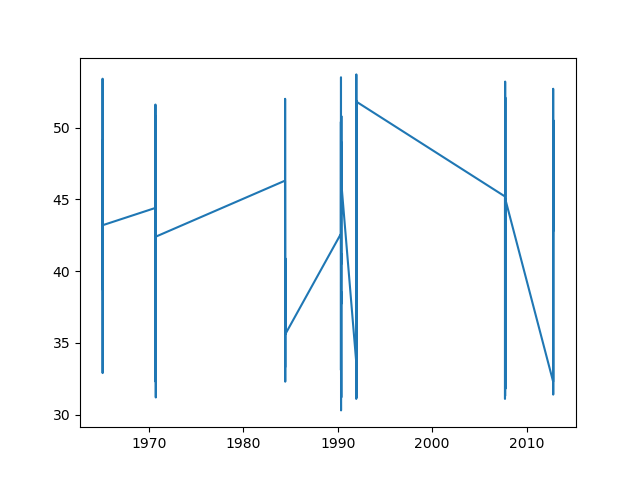

In [30]:
# 2) 
%matplotlib widget
dts = subdf.LabDateTime
vls = subdf.LabValue

plt.figure()
plt.plot(dts, vls)

In [35]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for December 14, 1991?

1) I would tell my PI that there is no lab value for that date for this patient. The closest date for a lab for this patient is from June 1984, and the values could have changed a lot in that year+ time span. Furthermore the lab values from this time frame vary from 33-50. We could perhaps take an average of these values but I would caution against extropolating too far with this information. Perhaps using the range of values would be informative to them however.



2) It appears that there was a lab for this patient on Dec 14, 1991 that is just slightly above 50.0